# Wczytywanie danych i wykresy

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

In [2]:
# wykresy w notatniku
%matplotlib inline

# biblioteka do tabelek
import pandas as pd

# biblioteka do wykresów
import matplotlib.pyplot as plt

# dodatkowe wykresy oraz ładniejszy styl
import seaborn as sns

## w przypadku braku seaborn, można:
# import matplotlib
# matplotlib.style.use('ggplot')

Umiejętność robienia wykresów to sprawa życia i śmierci (w zawodzie) dla analizujących dane.

Dane w plikach `smiertelnosc_polska_kobiety.csv` i `smiertelnosc_polska_mezczyzni.csv` są zaadaptowane z http://stat.gov.pl/obszary-tematyczne/ludnosc/trwanie-zycia/. Przedstawiają prawdopodobieństwo śmierci w przeciągu 5 lat (z wyjątkiem dla wieku 0 - wtedy w przeciągu roku, i 1 - wtedy w przeciągu 4 lat).

In [14]:
# ładujemy dane
df_k = pd.read_csv("../dane/smiertelnosc_polska_kobiety.csv", index_col="Wiek") 

In [20]:
# wyświetlamy je
df_k

,1950,1960,1970,1980,1990,2000,2010
Wiek,,,,,,,
0,0.09911,0.04830,0.02902,0.01783,0.01697,0.00733,0.00452
1,0.02258,0.00637,0.00372,0.00275,0.00209,0.00111,0.00079
5,0.00667,0.00219,0.00184,0.00158,0.00110,0.00067,0.00050
10,0.00491,0.00175,0.00149,0.00115,0.00109,0.00071,0.00058
15,0.00878,0.00277,0.00213,0.00181,0.00172,0.00145,0.00104
20,0.01216,0.00415,0.00288,0.00238,0.00188,0.00152,0.00111
25,0.01328,0.00550,0.00328,0.00288,0.00243,0.00186,0.00134
30,0.01533,0.00673,0.00451,0.00431,0.00382,0.00270,0.00206
35,0.01785,0.00900,0.00678,0.00666,0.00647,0.00457,0.00354


In [22]:
print("Nazwy kolumn: ", df_k.columns)
print("Indeksy wierzy: ", df_k.index)

Nazwy kolumn:  Index(['1950', '1960', '1970', '1980', '1990', '2000', '2010'], dtype='object')
Indeksy wierzy:  Int64Index([0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
            80],
           dtype='int64', name='Wiek')


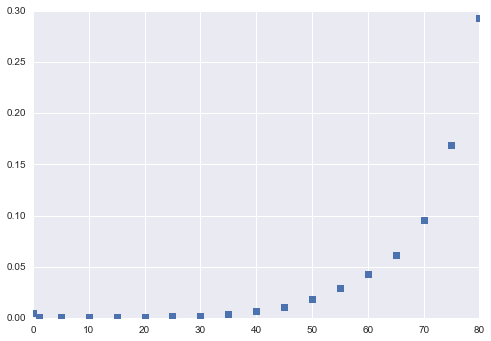

In [65]:
# "surowy" sposób rysowania wykresów: `plt.plot(X, Y, styl_punktu)`
plt.plot(df_k.index, df_k['2010'], 's')

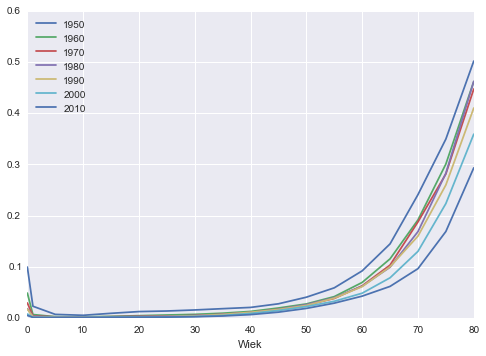

In [23]:
# wykres wszystkich danych
df_k.plot()

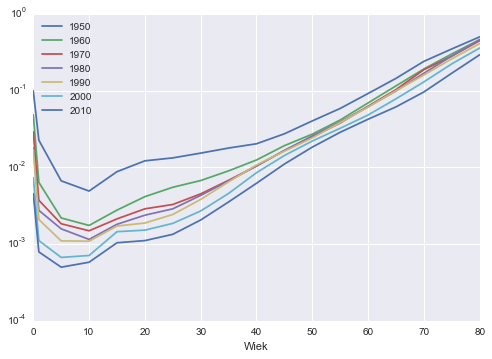

In [24]:
# opcje wykresu ustalawy zwykle przez opowiedni parametr
df_k.plot(logy=True)

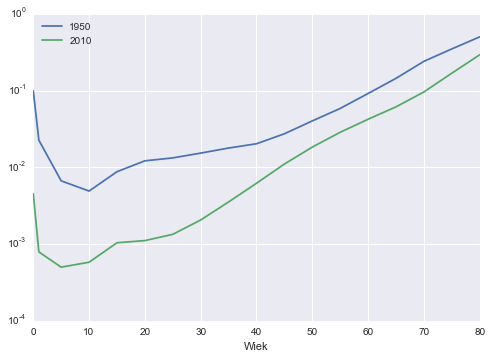

In [26]:
# a tak porównany tylko skrajne lata
df_k[['1950', '2010']].plot(logy=True)

In [30]:
# możemy też wybrać tylko jeden rok i na nim operować
ostatni_rok = df_k['2010']
ostatni_rok

Wiek
0     0.00452
1     0.00079
5     0.00050
10    0.00058
15    0.00104
20    0.00111
25    0.00134
30    0.00206
35    0.00354
40    0.00620
45    0.01104
50    0.01836
55    0.02865
60    0.04237
65    0.06140
70    0.09605
75    0.16870
80    0.29310
Name: 2010, dtype: float64

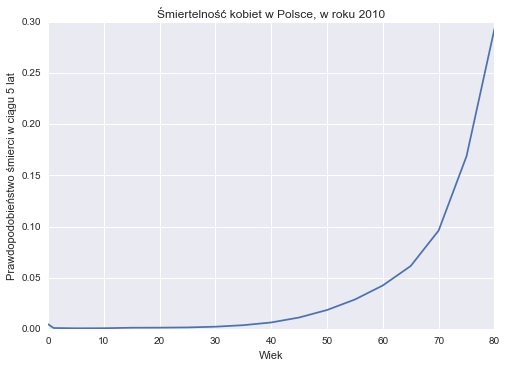

In [41]:
# wykres jak poprzendnio
ostatni_rok.plot()
# gdy chchemy dodać opisy, robimy to przez 
plt.title("Śmiertelność kobiet w Polsce, w roku 2010")
plt.ylabel("Prawdopodobieństwo śmierci w ciągu 5 lat")

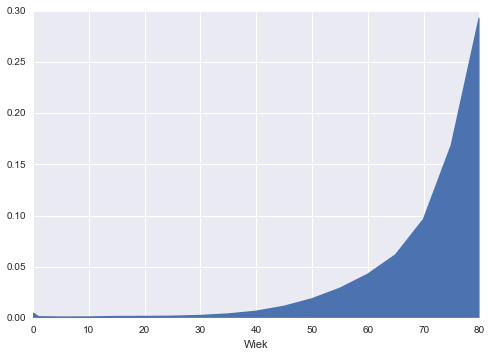

In [35]:
# opcja `kind` pozwala użyć różnych rodzajów wykresów
ostatni_rok.plot(kind='area')

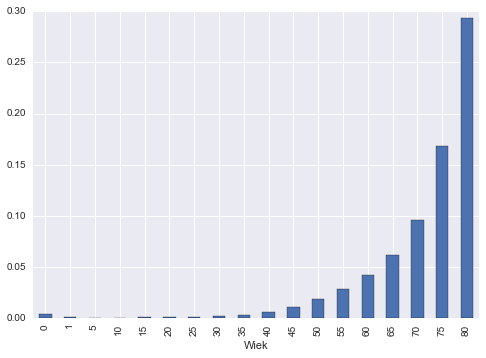

In [42]:
ostatni_rok.plot(kind='bar')

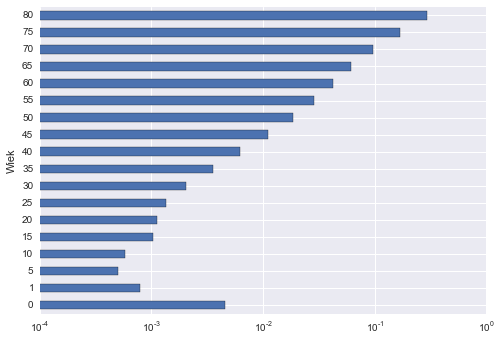

In [72]:
# opcje można łączyć
# (choć akurat zwykle nie stosuje się skali logarytmicznej do wykresów słupkowych)
ostatni_rok.plot(kind='barh', logx=True)

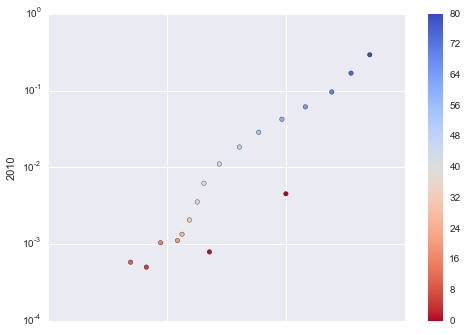

In [79]:
df_k.plot(x="1950", y="2010", c=df_k.index.values,
          kind='scatter',
          logx=True, logy=True,
          colormap='coolwarm_r',
          colorbar=True)

In [82]:
# no, ale nie możemy dyskryminować mężczyzn!
# (zwłaszcza, że wobec śmierci wszyscy jesteśmy równi)
df_m = pd.read_csv("../dane/smiertelnosc_polska_mezczyzni.csv", index_col="Wiek") 

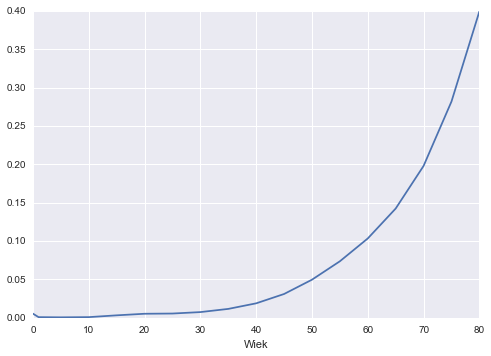

In [83]:
df_m["2010"].plot()

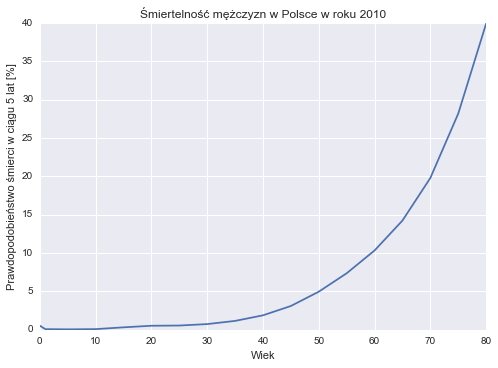

In [84]:
# a może chcemy dane w procentach?
(100 * df_m["2010"]).plot()
plt.title("Śmiertelność mężczyzn w Polsce w roku 2010")
plt.ylabel("Prawdopodobieństwo śmierci w ciągu 5 lat [%]")

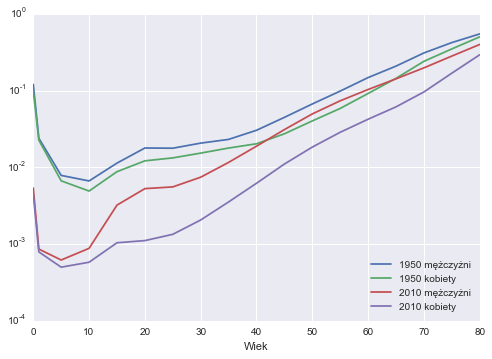

In [103]:
# może kilka na raz?
df_m["1950"].plot(label="1950 mężczyźni", logy=True)
df_k["1950"].plot(label="1950 kobiety")
df_m["2010"].plot(label="2010 mężczyźni")
df_k["2010"].plot(label="2010 kobiety")
plt.legend(loc='lower right')

In [88]:
# jak bardzo jest wyższa śmiertelność mężczyzn od kobiet?
stosunek_mk = df_m/df_k

In [89]:
stosunek_mk.head()

,1950,1960,1970,1980,1990,2000,2010
Wiek,,,,,,,
0,1.217032,1.254037,1.289456,1.344924,1.274602,1.203274,1.188053
1,1.059345,1.105181,1.252688,1.298182,1.330144,1.297297,1.088608
5,1.176912,1.511416,1.434783,1.493671,1.472727,1.537313,1.240000
10,1.354379,1.697143,1.550336,1.773913,1.587156,1.605634,1.517241
15,1.293850,2.104693,2.347418,2.817680,3.029070,2.551724,3.096154


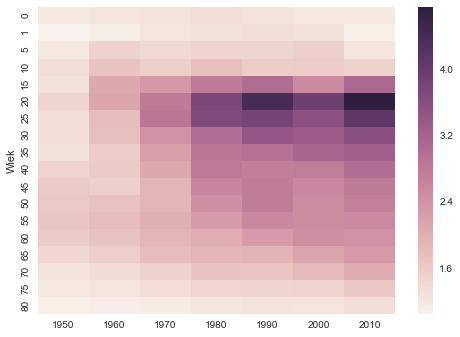

In [91]:
sns.heatmap(stosunek_mk, linewidths=0)

In [101]:
#by zamienić wiersze z kolumna mi robimy transpozycje
df_k.transpose()

Wiek,0,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80
1950,0.09911,0.02258,0.00667,0.00491,0.00878,0.01216,0.01328,0.01533,0.01785,0.02029,0.02737,0.04028,0.05858,0.09174,0.14451,0.24078,0.34941,0.50187
1960,0.04830,0.00637,0.00219,0.00175,0.00277,0.00415,0.00550,0.00673,0.00900,0.01247,0.01917,0.02710,0.04140,0.06912,0.11528,0.19136,0.30060,0.46189
1970,0.02902,0.00372,0.00184,0.00149,0.00213,0.00288,0.00328,0.00451,0.00678,0.01043,0.01651,0.02497,0.03784,0.06252,0.10308,0.18744,0.28122,0.44725
1980,0.01783,0.00275,0.00158,0.00115,0.00181,0.00238,0.00288,0.00431,0.00666,0.01041,0.01659,0.02570,0.03922,0.06171,0.09894,0.16845,0.28265,0.46216
1990,0.01697,0.00209,0.00110,0.00109,0.00172,0.00188,0.00243,0.00382,0.00647,0.01073,0.01622,0.02418,0.03840,0.06094,0.09981,0.15965,0.25971,0.41007
2000,0.00733,0.00111,0.00067,0.00071,0.00145,0.00152,0.00186,0.00270,0.00457,0.00851,0.01426,0.02203,0.03228,0.04808,0.07823,0.12989,0.22331,0.35899
2010,0.00452,0.00079,0.00050,0.00058,0.00104,0.00111,0.00134,0.00206,0.00354,0.00620,0.01104,0.01836,0.02865,0.04237,0.06140,0.09605,0.16870,0.29310


### Zadania

* Dla danego wieku zobacz jak się zmieniła śmiertelność w ostatnich 60 latach.
* Dla jakiego wielu najbardziej się zmieniła, a dla jakiego wieku - najmniej?
* Zamiast stosunku śmiertelności płci spróbuj użyć różnicy.
* Użyj skali logarytmicznej dla wieku.

## Zobacz też

* [Plotting - Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Overview of Python Visualization Tools](http://pbpython.com/visualization-tools-1.html)
* [Colormaps reference](http://matplotlib.org/examples/color/colormaps_reference.html)